# Worksheet 12

Name: **Bowen Li**  
UID: **U79057147**

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. **Classification**
2. **Not classification**
3. **Classification**
4. **Not classification**

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

Withhold a portion of the data for testing and train the model only on the rest. Afterwards, having the trained model predict outputs for reserved test set (data it has never seen before) and checking its performance can give us an idea on how it may perform on new data.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting is when the model lacks the complexity to accurately capture the relevant trends in the dataset. Signs of this could be when the model struggles to achieve sufficient accuracy on the training set.

Overfitting is when the model is too complex and adheres too well to the training set causing it to generalize poorly. Signs of this could include when the model has very high accuracy on training sets but low accuracy on test sets.

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

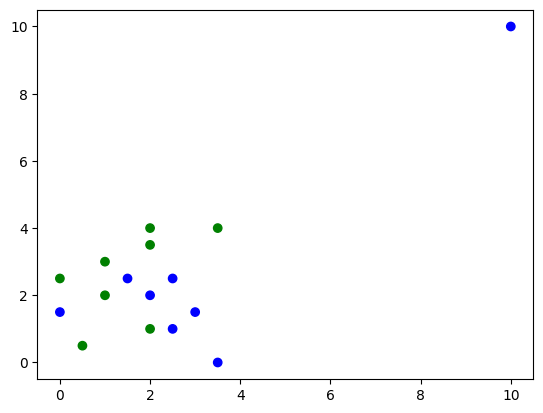

In [2]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

Yes, the point at (10,10) is very far from the rest of the dataset.

In [3]:
for key in data:
    data[key].pop()

data

{'Attribute A': [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.0],
 'Attribute B': [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
 'Class': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]}

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

The point at (0, 1.5) could be considered noise as it is blue with a lot of greens points surrounding it.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

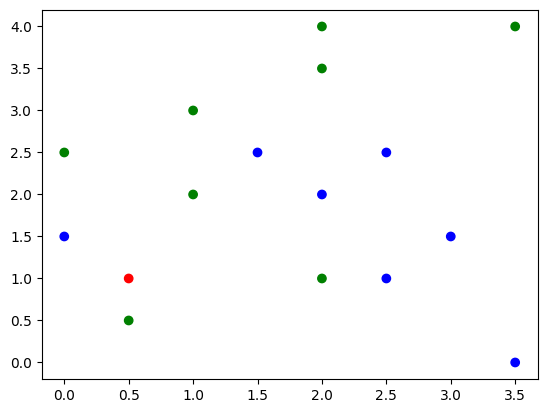

In [4]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"] + [0.5], data["Attribute B"] + [1], color=colors[data["Class"]].tolist() + ['r'])
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

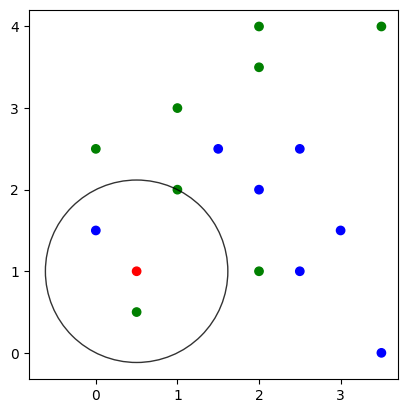

In [5]:
def n_closest_to(train_set_points, train_set_labels, example, n):
    differences = np.array(example) - train_set_points
    distances = np.linalg.norm(differences, axis=1)
    min_n_idx = np.argpartition(distances, n)[:n]
    sorted_idx = min_n_idx[np.argsort(distances[min_n_idx])]
    return train_set_points[sorted_idx], train_set_labels[sorted_idx] # returns (points, classes)

location = ( 0.5 , 1 )
all_points = np.array(list(zip(data["Attribute A"], data["Attribute B"])))
all_points_classes = np.array(data["Class"])

neighborhood_points, neighborhood_classes = n_closest_to(all_points, all_points_classes, location, 3)

radius = np.linalg.norm(np.array(location) - neighborhood_points[-1])
_, axes = plt.subplots()
axes.scatter(data["Attribute A"] + [0.5], data["Attribute B"] + [1], color=colors[data["Class"]].tolist() + ['r'])
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [6]:
def majority(neighborhood_classes):
    unique_classes, counts = np.unique(neighborhood_classes, return_counts=True)
    return unique_classes[np.argmax(counts)]

majority(neighborhood_classes) # Should be 1 (green class)

1

g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [7]:
count = 0
for i in range(all_points.shape[0]):
    actual_class = data["Class"][i]

    train_mask = np.ones(all_points.shape[0], dtype=bool)
    train_mask[i] = False
    training_set = all_points[train_mask]
    training_labels = all_points_classes[train_mask]

    _, neighborhood_classes = n_closest_to(training_set, training_labels, all_points[i], 3)
    prediction = majority(neighborhood_classes)
    if prediction == actual_class:
        count += 1

print("overall accuracy =", count/all_points.shape[0])

overall accuracy = 0.7333333333333333


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt


In [9]:
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)
print(X.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
print(f"X_train: {X_train.shape}\nX_test: {X_test.shape}")

X_train: (56000, 784)
X_test: (14000, 784)


b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = np.arange(1, 21)
accuracies = np.zeros(n_neighbors.shape)

for i in range(20):
  print("Using", i+1, "neighbors...")
  classifier = KNeighborsClassifier(n_neighbors=n_neighbors[i])
  classifier.fit(X_train, y_train)

  accuracies[i] = classifier.score(X_test, y_test)
  print("Accuracy:", accuracies[i])


Using 1 neighbors...
Accuracy: 0.9723571428571428
Using 2 neighbors...
Accuracy: 0.9675714285714285
Using 3 neighbors...
Accuracy: 0.9722142857142857
Using 4 neighbors...
Accuracy: 0.9709285714285715
Using 5 neighbors...
Accuracy: 0.9720714285714286
Using 6 neighbors...
Accuracy: 0.9710714285714286
Using 7 neighbors...
Accuracy: 0.9710714285714286
Using 8 neighbors...
Accuracy: 0.9695714285714285
Using 9 neighbors...
Accuracy: 0.9687142857142857
Using 10 neighbors...
Accuracy: 0.9680714285714286
Using 11 neighbors...
Accuracy: 0.9672142857142857
Using 12 neighbors...
Accuracy: 0.9667142857142857
Using 13 neighbors...
Accuracy: 0.9655714285714285
Using 14 neighbors...
Accuracy: 0.9657857142857142
Using 15 neighbors...
Accuracy: 0.9642142857142857
Using 16 neighbors...
Accuracy: 0.9636428571428571
Using 17 neighbors...
Accuracy: 0.9632142857142857
Using 18 neighbors...
Accuracy: 0.9628571428571429
Using 19 neighbors...
Accuracy: 0.9622857142857143
Using 20 neighbors...
Accuracy: 0.962214

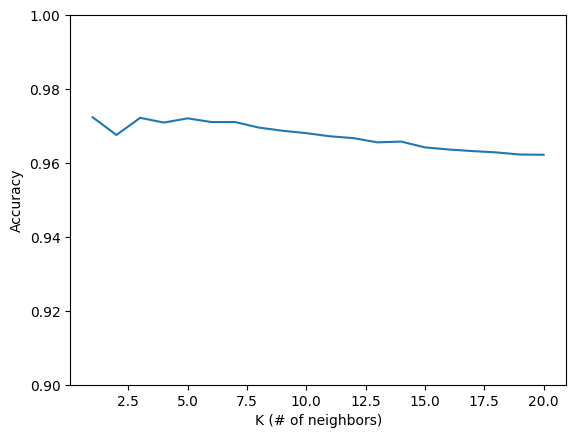

In [12]:
plt.plot(n_neighbors, accuracies)
plt.ylim(0.9, 1)
plt.ylabel("Accuracy")
plt.xlabel("K (# of neighbors)")
plt.show()

**A value of K=1 yields the highest accuracy.**

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

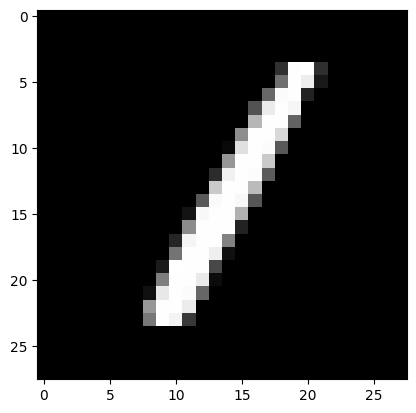

In [13]:
import matplotlib.cm as cm

best_k = n_neighbors[np.argmax(accuracies)]
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

random_idx = np.random.randint(0, high=X_test.shape[0])
example_digit = X_test[random_idx].reshape(28,28)

plt.figure()
plt.imshow(example_digit, cmap = cm.Greys_r)

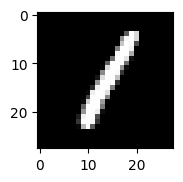

In [14]:
example_neighbors_idx = best_model.kneighbors(X_test[random_idx][np.newaxis], return_distance=False)
example_neighbors = X_train[example_neighbors_idx]
plt.figure(figsize=(9,6))
for i in range(best_k):
    ax = plt.subplot(3,3,i+1)
    neighbor_pic = example_neighbors[i].reshape(28,28)
    plt.imshow(neighbor_pic, cmap = cm.Greys_r)

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

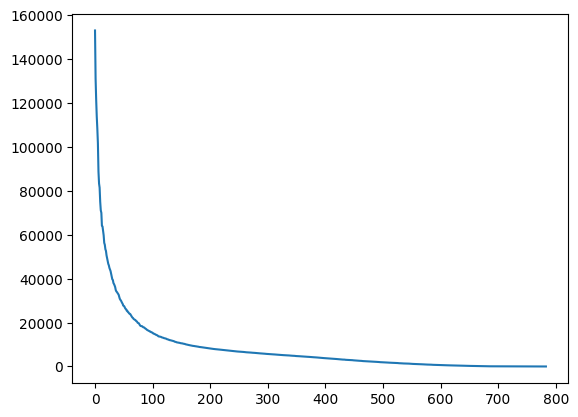

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=784)
pca.fit(X)

plt.plot(pca.singular_values_)
plt.show()

In [16]:
from sklearn.pipeline import make_pipeline

dimensionality_reduction = PCA(n_components=100)

n_neighbors = np.arange(1, 21)
accuracies_reduced = np.zeros(n_neighbors.shape)

for i in range(20):
  print("Using", i+1, "neighbors...")
  knn_model = KNeighborsClassifier(n_neighbors=n_neighbors[i])

  model = make_pipeline(dimensionality_reduction, knn_model)
  model.fit(X_train, y_train)

  accuracies_reduced[i] = model.score(X_test, y_test)
  print("Accuracy:", accuracies_reduced[i])


Using 1 neighbors...
Accuracy: 0.9755714285714285
Using 2 neighbors...
Accuracy: 0.9717857142857143
Using 3 neighbors...
Accuracy: 0.9746428571428571
Using 4 neighbors...
Accuracy: 0.9750714285714286
Using 5 neighbors...
Accuracy: 0.9755714285714285
Using 6 neighbors...
Accuracy: 0.9755
Using 7 neighbors...
Accuracy: 0.9734285714285714
Using 8 neighbors...
Accuracy: 0.9745
Using 9 neighbors...
Accuracy: 0.9723571428571428
Using 10 neighbors...
Accuracy: 0.9725
Using 11 neighbors...
Accuracy: 0.9717142857142858
Using 12 neighbors...
Accuracy: 0.9714285714285714
Using 13 neighbors...
Accuracy: 0.9705
Using 14 neighbors...
Accuracy: 0.9700714285714286
Using 15 neighbors...
Accuracy: 0.9694285714285714
Using 16 neighbors...
Accuracy: 0.9684285714285714
Using 17 neighbors...
Accuracy: 0.9683571428571428
Using 18 neighbors...
Accuracy: 0.9677857142857142
Using 19 neighbors...
Accuracy: 0.967
Using 20 neighbors...
Accuracy: 0.9664285714285714


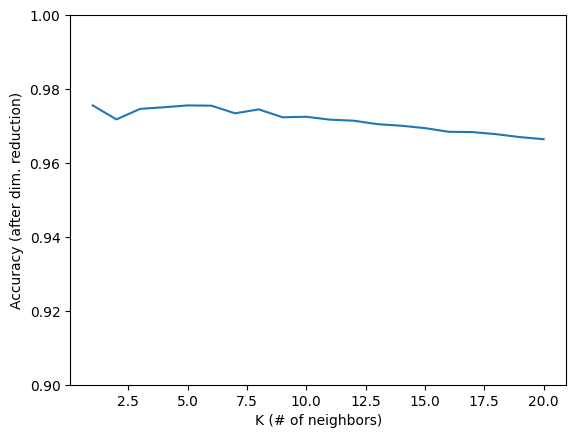

In [17]:
plt.plot(n_neighbors, accuracies_reduced)
plt.ylim(0.9, 1)
plt.ylabel("Accuracy (after dim. reduction)")
plt.xlabel("K (# of neighbors)")
plt.show()

**We chose to keep 100 dimensions since it seems that based on the graph of the singular values, most of the information about the data can be represented by the first 100 principal components. The accuracy increased from using the unprocessed dataset, likely because running SVD only kept the most variant 100 dimensions and as such reduced some of the noise points that may have caused incorrect KNN predictions in the full data.**

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

**Kaggle Username: lib250**

### Loading the Datasets

In [18]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(f"Training Set: {train_df.shape}")
print(f"Testing Set: {test_df.shape}")

Training Set: (891, 12)
Testing Set: (418, 11)


In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Extract Features

Here we create some new features
- `is_child` indicates whether the passenger was a child, which could be useful to emphasize since children had priority for lifeboats
- `is_woman` indicates (as a number) whether the passenger was a woman as women also had lifeboat priority
- `deck` takes the first letter of the passenger's cabin number and represents it as a number, which could be useful as cabin letters indicate the physical location of where the passenger stayed which could be a factor in whether or not a passenger was able to reach a lifeboat station quickly
- `fam_size` indicates the size of the passenger's family, which could be a factor in survival such as in cases where larger family members want to ensure the safety of everyone in their family

Of the rest, only `Pclass`, `Age`, and `Fare` seem to be reasonable factors in determining survival, as `Pclass` and `Fare` could indicate socioeconomic status.

In [21]:
def extract_features(df):
  y = None
  if "Survived" in df.columns:
    y = df["Survived"].to_numpy().copy()

  df["Age"].fillna(df["Age"].mean(), inplace=True)
  df["Fare"].fillna(df["Fare"].mean(), inplace=True)

  df["is_child"] = (df["Age"] < 19).astype(int)
  df["is_woman"] = (df["Sex"].str.lower() == "female").astype(int)
  df["deck"] = (df["Cabin"].str[:1])
  df["deck"].fillna('N', inplace=True)
  df["fam_size"] = df["SibSp"] + df["Parch"]

  deck_to_num = {'N': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
  df["deck"] = df["deck"].apply(lambda letter: deck_to_num[letter])

  features = df[["Pclass", "Age", "Fare", "is_child", "is_woman", "deck", "fam_size"]].copy()


  return features.to_numpy(), y


In [22]:
X_train, y_train = extract_features(train_df)
X_test, y_test = extract_features(test_df)

### Feature Normalization

Since `Age`, `Fare`, and `fam_size` could have very different scales, we normalize our features. This could be especially important for KNN wherein predictions are made based on distances between points.

We normalize two ways:

In [23]:
def normalize_minmax(features):
  return (features - features.min(axis=0)) / features.ptp(axis=0)

def normalize_std(features):
  return (features - features.mean(axis=0)) / features.std(axis=0)

In [24]:
num_train_examples = X_train.shape[0]

all_features = np.vstack((X_train, X_test))

normalized_features_mm = normalize_minmax(all_features)
normalized_features_std = normalize_std(all_features)

### Model Selection

We cross validate KNN with different values for `k` and different normalization methods on the training set using the leave-one-out scheme. The best accuracy we get is for `k=9` when normalizing the mean-centered data by the standard deviation.

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

def cross_val_acc(X, y, k):

  model = KNeighborsClassifier(n_neighbors=k)
  splits = LeaveOneOut()

  results = cross_val_score(model, X, y, cv=splits)

  return results.sum() / results.shape[0]


In [26]:
max_k = 20
k_vals = np.arange(1, max_k+1)

In [27]:
def apply_k_no_norm(k):
  return cross_val_acc(all_features[:num_train_examples], y_train, k)

def apply_k_mm(k):
  return cross_val_acc(normalized_features_mm[:num_train_examples], y_train, k)

def apply_k_std(k):
  return cross_val_acc(normalized_features_std[:num_train_examples], y_train, k)

vec_no_norm = np.vectorize(apply_k_no_norm)
vec_mm = np.vectorize(apply_k_mm)
vec_std = np.vectorize(apply_k_std)

In [28]:
k_acc_no_norm = vec_no_norm(k_vals)

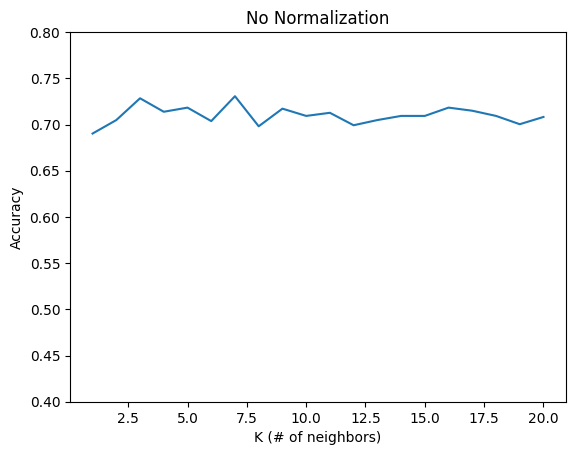

In [29]:
plt.plot(k_vals, k_acc_no_norm)
plt.ylim(0.4, 0.8)
plt.title("No Normalization")
plt.ylabel("Accuracy")
plt.xlabel("K (# of neighbors)")
plt.show()

In [30]:
k_acc_mm = vec_mm(k_vals)

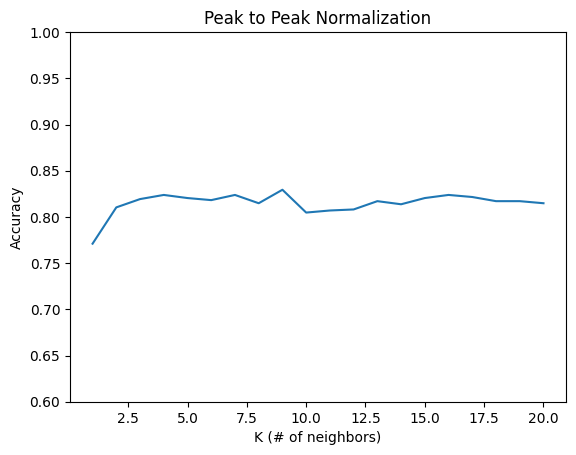

In [31]:
plt.plot(k_vals, k_acc_mm)
plt.ylim(0.6, 1)
plt.title("Peak to Peak Normalization")
plt.ylabel("Accuracy")
plt.xlabel("K (# of neighbors)")
plt.show()

In [32]:
k_acc_std = vec_std(k_vals)

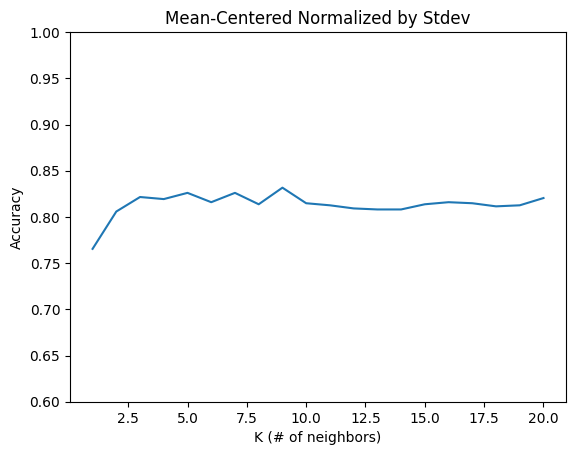

In [33]:
plt.plot(k_vals, k_acc_std)
plt.ylim(0.6, 1)
plt.title("Mean-Centered Normalized by Stdev")
plt.ylabel("Accuracy")
plt.xlabel("K (# of neighbors)")
plt.show()

In [34]:
np.max(k_acc_no_norm), np.max(k_acc_mm), np.max(k_acc_std)

(0.7306397306397306, 0.8294051627384961, 0.8316498316498316)

In [35]:
optimal_k = k_vals[np.argmax(k_acc_std)]
optimal_k

9

In [36]:
opt_model = KNeighborsClassifier(n_neighbors=optimal_k)
opt_model.fit(normalized_features_std[:num_train_examples], y_train)

KNeighborsClassifier(n_neighbors=9)

### Testing

Here we make our predictions and write it into our submission `csv` file.

In [37]:
predictions = opt_model.predict(normalized_features_std[num_train_examples:])

In [38]:
submission_df = test_df[["PassengerId"]].copy()
submission_df["Survived"] = predictions
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [39]:
submission_df.to_csv('titanic_submission.csv', index=False)

The predictions scored `0.75598` on Kaggle under the username `lib250`.